In [1]:
import coco_dataset
import pathlib
import show_utils
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np
import torch
import common
import dataset_utils

In [2]:
coco_dataset = coco_dataset.CocoKeypoints(
    root=str(pathlib.Path("coco") / "images" / "train2017"),
    annFile=str(
        pathlib.Path("coco")
        / "annotations"
        / "annotations"
        / "person_keypoints_train2017.json"
    ),
    transform=transforms.Resize([224, 224]),
    resize_keypoints_to=[224, 224],
)
i=0

loading annotations into memory...
Done (t=6.44s)
creating index...
index created!


In [3]:
i=6

7


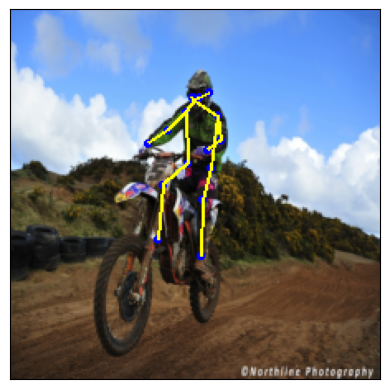

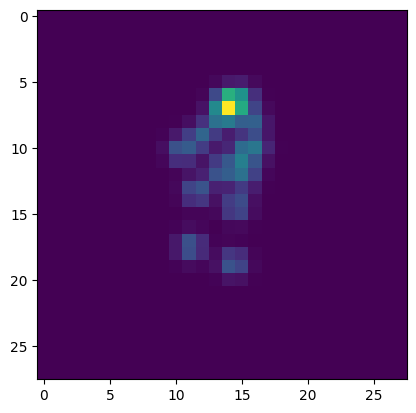

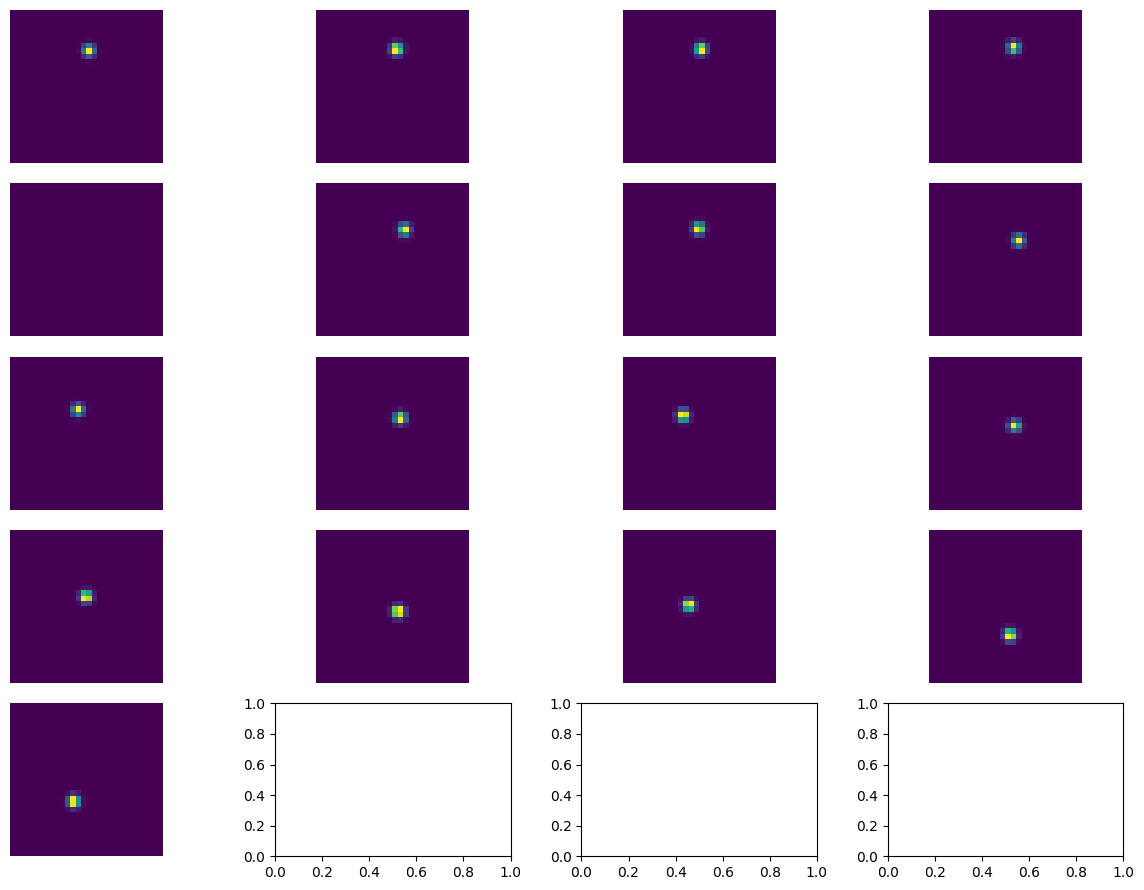

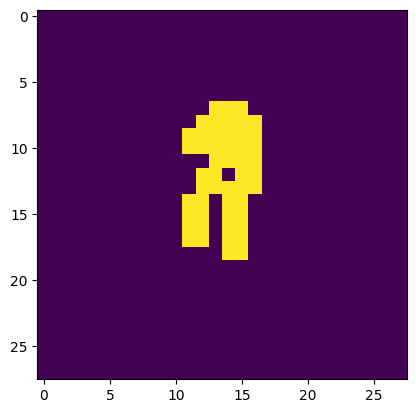

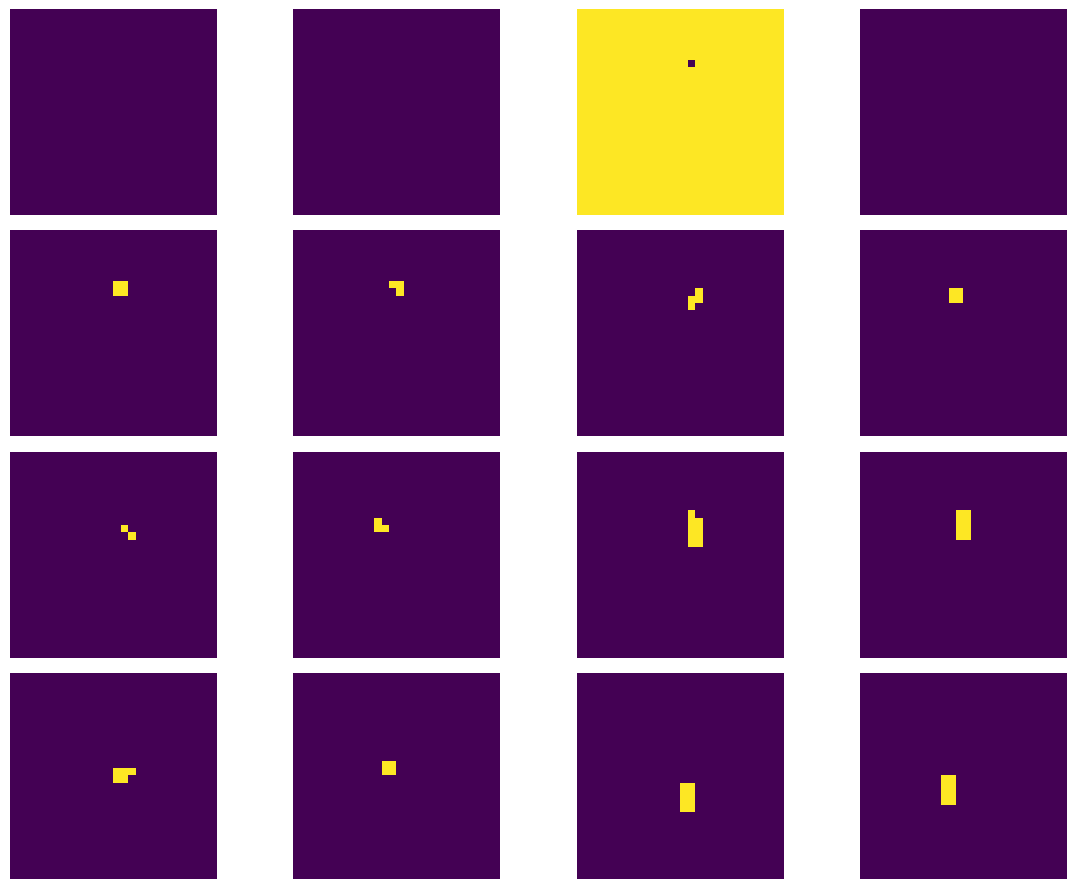

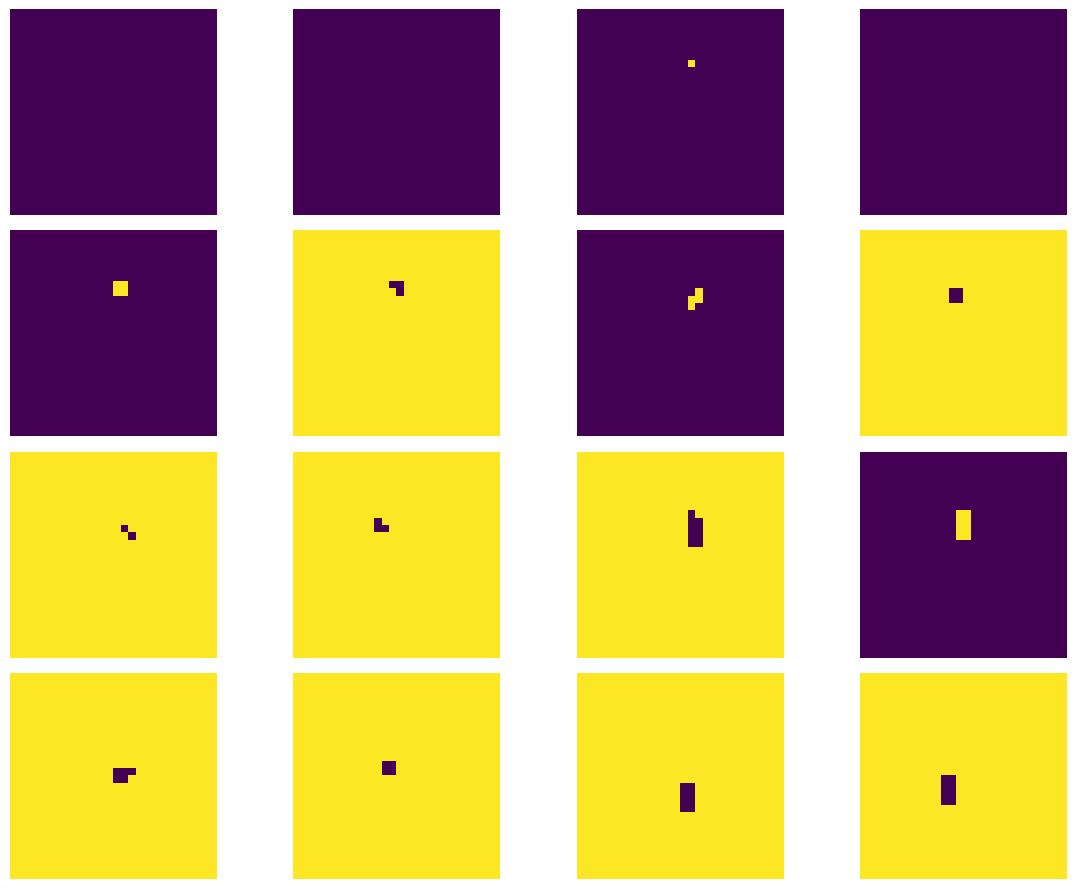

In [5]:
sample = coco_dataset[i]
image, keypoints = sample


show_utils.show_annotated(image, keypoints)

pafs = dataset_utils.get_pafs(keypoints)
heatmaps = dataset_utils.get_heatmaps(keypoints)

plt.figure()
show_utils.show_heatmaps_combined(heatmaps)

show_utils.show_heatmaps(heatmaps)

plt.figure()
show_utils.show_pafs_combined(pafs)

show_utils.show_pafs(pafs)
# plt.figure()
# show_utils.show_pafs_quiver_combined(pafs)


print(i)
i+=1